In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
plt.rc('font', family='Verdana')

Форма массива X: (26, 2)


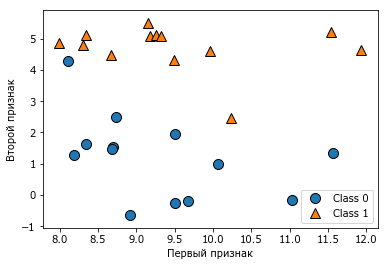

In [25]:
#генерирум набор данных
X, y = mglearn.datasets.make_forge()
#строим график для набора данных
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
print("Форма массива X: {}".format(X.shape))

Text(0, 0.5, 'Целевая переменная')

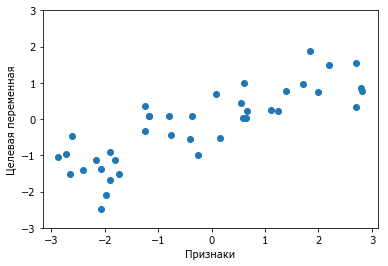

In [36]:
#пример регрессии
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('Признаки')
plt.ylabel('Целевая переменная')

In [60]:
#Данные раковых опухлей молочной железы
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer['data'].shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)
<class 'numpy.ndarray'>


In [57]:
# Количество доброкачественных (benign) и злокачественных (malignant) опухолей
print({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

{'malignant': 212, 'benign': 357}


In [72]:
#Данные районов продажи домов в Бостоне
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [73]:
# Производные признаки для Бостонского набора данных, которые включает дополнительные значения
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


In [8]:
# Пример К ближайших соседей
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [92]:
from sklearn.neighbors import KNeighborsClassifier
# устанавливаем значение 3ёх ближайших точек
k_means = KNeighborsClassifier(n_neighbors=3)
k_means.fit(X_train, y_train)

# прогнозы на тестовом наборе данных
k_means.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [94]:
# Правильность на тестовом наборе
print("{:.2f}".format(k_means.score(X_test, y_test)))

0.86


# Анализ работы KNeighborsClassifier

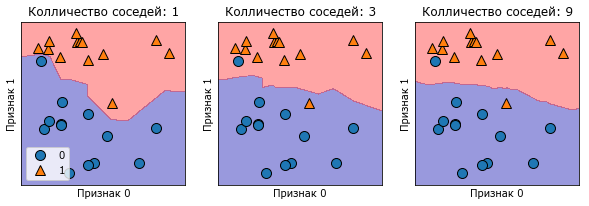

In [103]:
# Проверка на 1, 3, 9 ближайших соседей
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    k_means = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(k_means, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("Колличество соседей: {}".format(n_neighbors))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
axes[0].legend(loc=3)

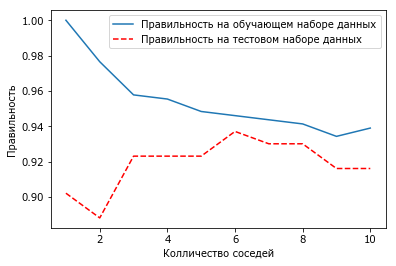

In [113]:
#здесь мы берем набор данных опухлей молочной железы и использум K'ближайших
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    #строим модель
    k_means = KNeighborsClassifier(n_neighbors = n_neighbors)
    k_means.fit(X_train, y_train)
    #записываем правильность на обучающем наборе
    training_accuracy.append(k_means.score(X_train, y_train))
    #записываем правильность на тестовом наборе
    test_accuracy.append(k_means.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Правильность на обучающем наборе данных")
plt.plot(neighbors_settings, test_accuracy, label="Правильность на тестовом наборе данных", linestyle='dashed', color='red')
plt.ylabel('Правильность')
plt.xlabel('Колличество соседей')
plt.legend()

# Регрессия k ближайших соседей

In [116]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

# разбиваем набор данных wave на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#создаём экземпляр модели и устанавливаем количество соседей равным 3
reg = KNeighborsRegressor(n_neighbors = 3)
# подгоняем модель с использованием обучающих данных и обучающих ответов
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [117]:
print('Прогнозы для тестового набора:\n{}'.format(reg.predict(X_test)))

Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [118]:
print('R^2 на тестовом наборе данных: {:.2f}'.format(reg.score(X_test, y_test)))

R^2 на тестовом наборе данных: 0.83


### Анализ модели KNeighborsRegressor

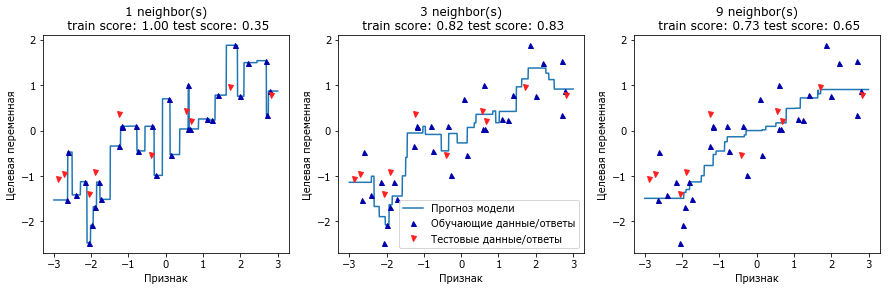

In [135]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
# создаём 1000 точек данных равномерной распределний
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,9], axes):
    # получаем прогнозы используя 1, 3, 9 соседей
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=5)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=5)    
    
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('Признак')
    ax.set_ylabel('Целевая переменная')

axes[1].legend(["Прогноз модели","Обучающие данные/ответы", "Тестовые данные/ответы"], loc="lower right")

# Линейные модели

In [9]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [11]:
# Выводим параметр наклона прямой (w) веса/коэффицент и сдвиг/константа (b)
print('lr.coef: {}'.format(lr.coef_))
print('lr.intercept: {}'.format(lr.intercept_))

lr.coef: [0.39390555]
lr.intercept: -0.031804343026759746


In [13]:
# проверка правильности прогнооза модели
print('на обучающем наборе: {:.2f}'.format(lr.score(X_train, y_train)))
print('на тестовом наборе: {:.2f}'.format(lr.score(X_test, y_test)))

на обучающем наборе: 0.67
на тестовом наборе: 0.66


In [15]:
# как видим результат 0,66. относительно это мало. возьмём данные с большим признаком и наблюдений. ниже код
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print('на обучающем наборе: {:.2f}'.format(lr.score(X_train, y_train)))
print('на тестовом наборе: {:.2f}'.format(lr.score(X_test, y_test)))

на обучающем наборе: 0.95
на тестовом наборе: 0.61


In [16]:
# мы видим что данные в тестовом наборе намного меньше чем в обучающем, это говорит нам о том что модель ПЕРЕОБУЧЕНА.
# для более качественного прогноза будем использовать Гребневую регрессию

### Гребневая регрессия

In [17]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print('на обучающем наборе: {:.2f}'.format(ridge.score(X_train, y_train)))
print('на тестовом наборе: {:.2f}'.format(ridge.score(X_test, y_test)))

на обучающем наборе: 0.89
на тестовом наборе: 0.75


In [21]:
# пример с использованием переметра alpha. По умолчанию он равен 1. 
# При увелечении alpha мы заставляем коэффиценты сжиматься до всё более к близких  к нулю значений
# При уменьшении alpha мы сжимаем коэффиценты в меньшей степени, что означает движение вправо на графике
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Увелечение параметра alpha')
print('на обучающем наборе: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('на тестовом наборе: {:.2f}'.format(ridge10.score(X_test, y_test)))

print()

# Модель очень близка к линейной регрессии
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Уменьшение параметра alpha')
print('на обучающем наборе: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('на тестовом наборе: {:.2f}'.format(ridge10.score(X_test, y_test)))

Увелечение параметра alpha
на обучающем наборе: 0.79
на тестовом наборе: 0.64

Уменьшение параметра alpha
на обучающем наборе: 0.79
на тестовом наборе: 0.64


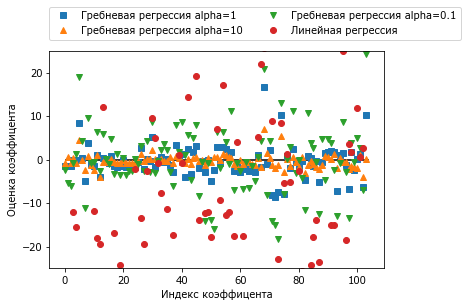

In [46]:
plt.plot(ridge.coef_, 's', label='Гребневая регрессия alpha=1')
plt.plot(ridge10.coef_, '^', label='Гребневая регрессия alpha=10')
plt.plot(ridge01.coef_, 'v', label='Гребневая регрессия alpha=0.1')
plt.plot(lr.coef_, 'o', label='Линейная регрессия')

plt.xlabel('Индекс коэффицента')
plt.ylabel('Оценка коэффицента')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend(ncol=2, loc=(0, 1.05))

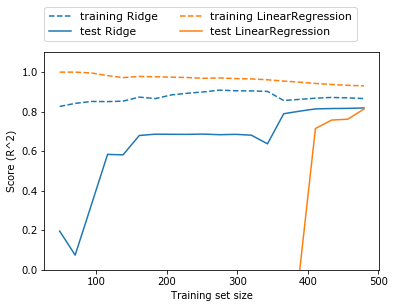

In [35]:
mglearn.plots.plot_ridge_n_samples()

### Лассо-регрессия

In [39]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

In [40]:
# Лассо регрессия даёт меньшие значения, это нам говорит о её недообучения
print('на обучающем наборе: {:.2f}'.format(lasso.score(X_train, y_train)))
print('на тестовом наборе: {:.2f}'.format(lasso.score(X_test, y_test)))
print('количество использованных признаков: {}'.format(np.sum(lasso.coef_ != 0)))

на обучающем наборе: 0.29
на тестовом наборе: 0.21
количество использованных признаков: 4


In [42]:
# попробуем уменьшить alpha значение,при это нужно увеличить значения параметра max_iter
# при такой корректировки количество использованных признаков намного больше, чем в выше
lasso001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print('на обучающем наборе: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('на тестовом наборе: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('количество использованных признаков: {}'.format(np.sum(lasso001.coef_ != 0)))

на обучающем наборе: 0.94
на тестовом наборе: 0.74
количество использованных признаков: 67


In [44]:
# Однако использовав низкое значение alpha, получим переобучение модели
lasso00001 = Lasso(alpha=0.00001, max_iter=1000000).fit(X_train, y_train)
print('на обучающем наборе: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('на тестовом наборе: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('количество использованных признаков: {}'.format(np.sum(lasso00001.coef_ != 0)))

на обучающем наборе: 0.95
на тестовом наборе: 0.62
количество использованных признаков: 103


Text(0, 0.5, 'Оценка коэффицента')

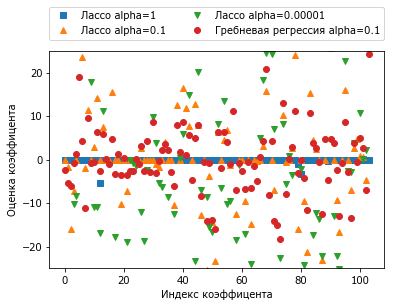

In [45]:
# строим график
plt.plot(lasso.coef_, 's', label='Лассо alpha=1')
plt.plot(lasso001.coef_, '^', label='Лассо alpha=0.1')
plt.plot(lasso00001.coef_, 'v', label='Лассо alpha=0.00001')
plt.plot(ridge01.coef_, 'o', label='Гребневая регрессия alpha=0.1')

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel('Индекс коэффицента')
plt.ylabel('Оценка коэффицента')

### Линеные модели для задач классификации

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

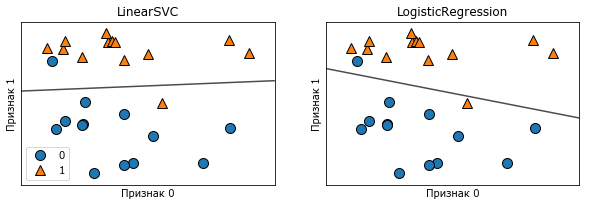

In [53]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=100000), LogisticRegression(solver='lbfgs')], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel('Признак 0')
    ax.set_ylabel('Признак 1')
axes[0].legend()

In [79]:
# Проанализируем работу класса LogisticRegression на наборе данных Breast Cancer
# так как модель на тестовом и обучающем наборе одинаково, вполне вероятно модель недообучена
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(solver='lbfgs', max_iter=5000).fit(X_train, y_train)
print('на обучающем наборе: {:.3f}'.format(logreg.score(X_train, y_train)))
print('на тестовом наборе: {:.3f}'.format(logreg.score(X_test, y_test)))

на обучающем наборе: 0.958
на тестовом наборе: 0.958


In [80]:
# Давайте использовать параметр С для более точного предсказания
logreg100 = LogisticRegression(solver='lbfgs', max_iter=5000, C=100).fit(X_train, y_train)
print('на обучающем наборе: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('на тестовом наборе: {:.3f}'.format(logreg100.score(X_test, y_test)))

на обучающем наборе: 0.984
на тестовом наборе: 0.965


In [81]:
# Посмотрим что нам даст если мы уменьшим параметр C
logreg001 = LogisticRegression(solver='lbfgs', max_iter=5000, C=0.01).fit(X_train, y_train)
print('на обучающем наборе: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('на тестовом наборе: {:.3f}'.format(logreg001.score(X_test, y_test)))

на обучающем наборе: 0.953
на тестовом наборе: 0.951


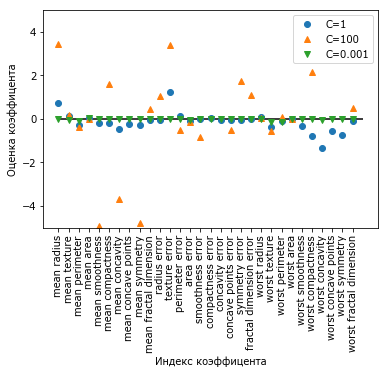

In [83]:
# Глянем в график
# по умолчанию здесь используется L2 регуляризация
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Индекс коэффицента")
plt.ylabel("Оценка коэффицента")
plt.legend()

Правильность на обучающем для логрегрессии l1 с С=0.001 : 0.91
Правильность на тестовом для логрегрессии l1 с С=0.001 : 0.92
Правильность на обучающем для логрегрессии l1 с С=1.000 : 0.96
Правильность на тестовом для логрегрессии l1 с С=1.000 : 0.96
Правильность на обучающем для логрегрессии l1 с С=100.000 : 0.99
Правильность на тестовом для логрегрессии l1 с С=100.000 : 0.98


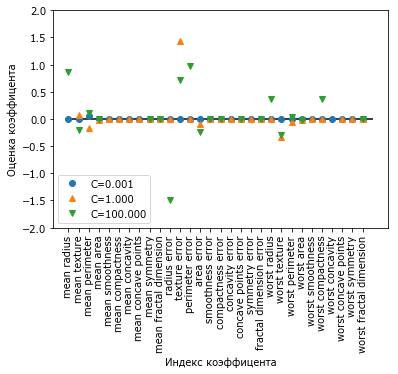

In [101]:
# Коэффиценты логистической регресии с L1-штрафом для набора данных Breast Cancer
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', max_iter=5000, C=C, penalty='l1').fit(X_train, y_train)
    print('Правильность на обучающем для логрегрессии l1 с С={:.3f} : {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('Правильность на тестовом для логрегрессии l1 с С={:.3f} : {:.2f}'.format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Индекс коэффицента")
plt.ylabel("Оценка коэффицента")
plt.ylim(-2, 2)
plt.legend(loc=3)

### Линейные модели для мультиклассовой классификации

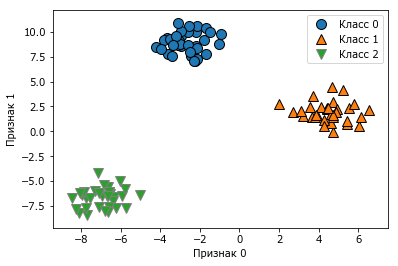

In [103]:
# подход "один против остальных"
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')
plt.legend(['Класс 0', 'Класс 1', 'Класс 2',])

In [105]:
# Теперь обучаем на этих наборах данных классификатор класса LinearSVC
linear_svm = LinearSVC().fit(X, y)
print('Форма коэффициента: ', linear_svm.coef_.shape)
print('Форма константы: ', linear_svm.intercept_.shape)

Форма коэффициента:  (3, 2)
Форма константы:  (3,)


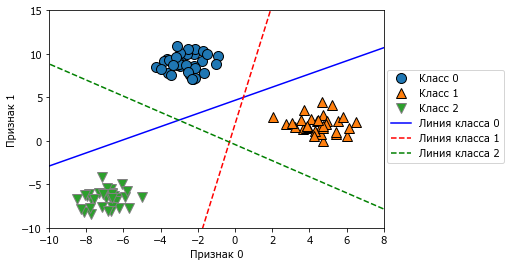

In [107]:
# Визуализация линии границы принятия решений полученные с помощью трёх бинарных классификаторов
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color, linestyle in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g'], ['-', '--', '--']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color, linestyle=linestyle)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1', 'Линия класса 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Признак 1')

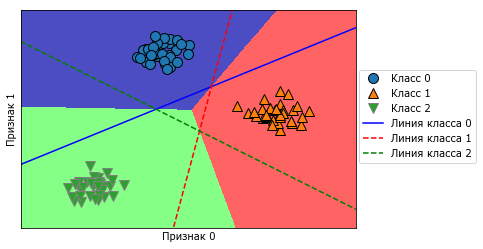

In [108]:
# Мультиклассовые границы принятий решений, полученные с помощью трёх бинарных классификаторов в рамках подхода "один против всех"
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
for coef, intercept, color, linestyle in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g'], ['-', '--', '--']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color, linestyle=linestyle)
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1', 'Линия класса 2'], loc=(1.01, 0.3))
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')